#Premier League Football Analysis


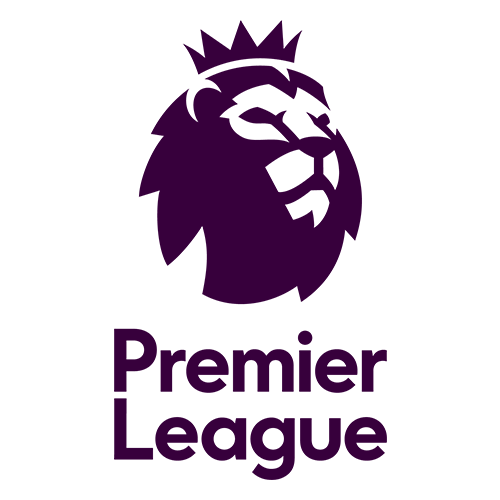

**Group:** Cody Li, Shreyas Pant

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the Data
The first step in our data exploration process is to get the necessary data. For this tutorial, we will be using data on the 2018-2019 Premier League Football season provided by datahub.io. You can download the data yourself at by clicking [HERE](https://datahub.io/sports-data/english-premier-league#resource-season-1819).

Fortunately, the data is provided in CSV format which eliminates the need to scrape the data inside HTML tags. We can start working with the data simply by using Pandas' built in .read_csv() function which will return a Pandas.DataFrame for us to use.

In [ ]:
# Provided by https://datahub.io/sports-data/english-premier-league#resource-season-1819

raw_data = pd.read_csv('https://pkgstore.datahub.io/sports-data/english-premier-league/season-1819_csv/data/916634f7ec37dd45c86159bc723eb340/season-1819_csv.csv')
raw_data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


## The Columns
After importing the data into Python, we can see that the imported data has 62 columns. For this tutorial, we will not be using most of these columns as they serve little purpose for data exploration. Therefore we will be dropping these columns to reduce the number of columns in my DataFrame in order to make it more readable.

For those unfamiliar with soccer/football statistics acronyms, here are some of the columns that we will be using and what each of them represent:

- FTHG --> Full Time Home Goals (how many goals the home team scored in 90 minutes)
- FTAG --> Full Time Away Goals (how many goals the away team scored in 90 minutes)
- FTR --> Full Time Result (who won, H is home, A is away, D is draw)
- HTHG --> Half Time Home Goals (how many goals the home team scored in 45 minutes)
- HTAG --> Half Time Away Goals (how many goals the away team scored in 45 minutes)
- HTR --> Half Time Result
- HS --> Home Shots 
- AS --> Away Shots
- HST --> Home Shots on Target
- AST --> Away Shots on Target
- HF --> Home Fouls
- AF --> Away Fouls
- HC --> Home Crosses
- AC --> Away Crosses
- HY --> Home Yellow Cards
- AY --> Away Yellow Cards
- HR --> Home Red Cards
- AR --> Away Red Cards
- B365H --> Odds from Bet365 for a Home Victory
- B365D --> Odds from Bet365 for a Draw
- B365A --> Odds from Bet365 for an Away Victory

The remaining columns are represent betting odds from other betting platforms and other related statistics which serve little purpose for the sake of our data exploration. Additionally, the 'Div' column serves no purpose for this dataset as all entries belong in the same 'Div'.

## Cleaning and Preprocessing
Often times when we use datasets on the internet, the dataset may not be very usable and may require some cleaning and preprocessing to make it more readable and easier to use. There are multiple ways to clean and preprocess data, such as directly editing the data using some sort of text editor or fixing CSV data in Microsoft Excel/Google Sheets. While these methods are great for quickly fixing small errors in small datasets, they can become very time consuming in larger datasets with more errors.

For this tutorial, we will be importing the data into Pandas and doing the preprocessing using a DataFrame as the Pandas library provides a variety of simple and useful functions for cleaning and preprocessing data quickly and efficiently. More info on Pandas DataFrames and built in functions can be found at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

Some of the problems we may encounter with these datasets include but are not limited to:

- Missing or incomplete data in some entries. 
- Unintentional duplicates (columns, entries, etc)
- Extraneous rows/columns often encountered when web scraping.
- Incorrect data formatting (i.e. data/time data can can be hard to parse when not in proper format)
- Unnecessarily separation of data into multiple columns (i.e. separaing phone number into 3-4 columns when not needed)
- Qualitative data needs to be one-hot encoded for modeling

For our data, luckily, it is mostly usable, but one potential issue we ran into was that the dates in our 'Date' column were in European format (dd/mm/yyyy) and were not automatically parsed as a 'datetime' type by Pandas. This required us to convert the 'Date' column into a 'datetime' type using Pandas.to_datetime() specifying that the date started with the day first.

In [ ]:
df = raw_data.copy()

# Check output below to see that all entries have the same 'Div' value and therefore the column serves little purpose.
print(raw_data['Div'].unique())

# Removing the unnecessary columns for better readability
df = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']]

# Converting date column into datetime type with European date format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values(by=['Date'], ascending=False)
df.head(10)

['E0']


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,8,...,8,2,5,2,1,0,0,1.57,3.9,7.50
1,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,12,...,9,7,4,1,1,0,0,1.90,3.6,4.50
2,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,15,...,11,5,5,1,2,0,0,2.50,3.4,3.00
3,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,6,...,8,2,5,2,1,0,0,6.50,4.0,1.61
4,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,15,...,12,3,5,2,2,0,0,3.90,3.5,2.04
5,2018-08-11,Watford,Brighton,2,0,H,1,0,H,19,...,16,8,2,2,2,0,0,2.37,3.2,3.40
6,2018-08-11,Wolves,Everton,2,2,D,1,1,D,11,...,7,3,6,0,1,0,1,2.37,3.3,3.30
7,2018-08-12,Arsenal,Man City,0,2,A,0,1,A,9,...,14,2,9,2,2,0,0,4.00,3.8,1.95
8,2018-08-12,Liverpool,West Ham,4,0,H,2,0,H,18,...,9,5,4,1,2,0,0,1.25,6.5,14.00
9,2018-08-12,Southampton,Burnley,0,0,D,0,0,D,18,...,9,8,5,0,1,0,0,1.85,3.5,5.00


## Finding the Winning and Losing Teams
For our dataset, notice how the winning and losing teams are not explicitly recorded in a column. We are, however, given the 'FTR' column which records the result whether that may be the home team won, or the away team won, or there was a draw. To make the data more readable and easier to use, we can use this info to create two new columns that explicityly record the winning and losing teams.

There are multiple approaches to adding the winning and losing team columns such as iterating throught each row using .iterrows(), using the apply() method with a lambda function, or using vectorized functions. While the first two are valid options and are more intuitive, for this tutorial, we will be using vectorized functions as the are more optimized and can be significantly faster than the previous two approaches. For more information on how to speed up operations using vectorized functions, check this article: https://plainenglish.io/blog/pandas-how-you-can-speed-up-50x-using-vectorized-operations

In [ ]:
%%timeit
# Vectorizied functions using numpy's where function to conditionally select the winning and losing teams based off 'FTR' column.
df['WinTeam'] = np.where(df['FTR'] == 'H', df['HomeTeam'], np.where(df['FTR'] == 'A', df['AwayTeam'], 'Draw'))
df['LoseTeam'] = np.where(df['FTR'] == 'A', df['HomeTeam'], np.where(df['FTR'] == 'H', df['AwayTeam'], 'Draw'))
df.head()

3.29 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
# Using the .apply() method with lambda functions on the DataFrame to select the winning and losing teams.
df['WinTeam'] = df.apply(lambda row: row['HomeTeam'] if row['FTR'] == 'H' else (row['AwayTeam'] if row['FTR'] == 'A' else 'Draw'), axis=1)
df['LoseTeam'] = df.apply(lambda row: row['HomeTeam'] if row['FTR'] == 'A' else (row['AwayTeam'] if row['FTR'] == 'H' else 'Draw'), axis=1)

38.3 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Notice that the average runtime of the vectorized function is significantly faster than using apply. From a practicality standpoint, they're both in miliseconds right now so a normal person would not be able to really tell a difference. But datasets grow larger, the difference in execution time may grows increasingly apparent. (miliseconds vs minutes)

In the Premier League Football, or rather in any sports league, there is the concept of an Home Team and an Away Team. The Home Team is the team playing in their home stadium whereas the Away Team the one playing in another team's stadium. We check for if teams playing in their home stadiums have a higher winrate compared to playing away by quickly generating a pie chart representing the results of home games.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


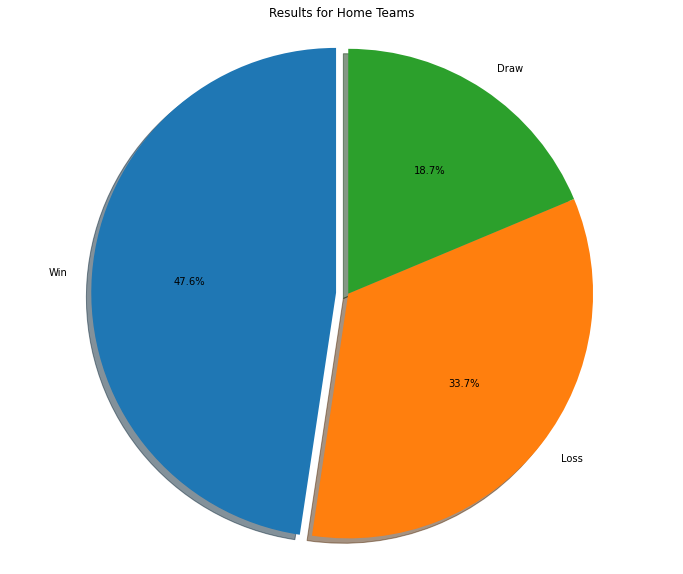

In [ ]:
# Get the necessarily columns from the main dataframe
results = df.copy()[['Date', 'HomeTeam', 'AwayTeam', 'FTR']]

# Rename column to Result
results.rename({results.columns[3] : 'Result'}, axis=1, inplace=True)

# Remap values in Results column to full word
resmap = {'H' : 'Win', 'A' : 'Loss', 'D' : 'Draw'}
results = results.replace({'Result' : resmap})

# Get a count of the number of instances for each result
res_count = results['Result'].value_counts()

# Create the pie chart
explode = [0.05, 0, 0]
plt.figure(figsize=(12,10))
plt.pie(res_count.values, explode=explode, labels=res_count.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Results for Home Teams')
plt.axis('equal')
plt.show()

As we can see here, it appears that for the most part, Home Teams generally win more when playing in their home stadiums. But from this chart alone, we cannot be sure if playing in their home stadiums actually give them advantage over away teams resulting in higher win rates.

Let us divide the data to show the breakdown of results of Home Games for each team. To do this, we would need to count each results for each team which can be done by grouping the data using the HomeTeam and Result columns and counting them. We would then need transform this into a pivot table so that we can separate the counts for each result into their own columns.

In [ ]:
# Groupby to count results for each team for each result
dfg = results.groupby(['HomeTeam', 'Result']).size().reset_index()
dfg.rename({dfg.columns[2] : 'Count'}, axis=1, inplace=True)

# Pivot table to separate the counts into each column and separate teams by rows
results = dfg.pivot_table(index='HomeTeam', columns='Result', values='Count')
results

Result,Draw,Loss,Win
HomeTeam,,,
Arsenal,3.0,2.0,14.0
Bournemouth,5.0,6.0,8.0
Brighton,5.0,8.0,6.0
Burnley,2.0,10.0,7.0
Cardiff,2.0,11.0,6.0
Chelsea,6.0,1.0,12.0
Crystal Palace,5.0,9.0,5.0
Everton,4.0,5.0,10.0
Fulham,3.0,10.0,6.0


We will use the pivot table above to generate a stacked bar graph for each team showing the breakdown of their home game results.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

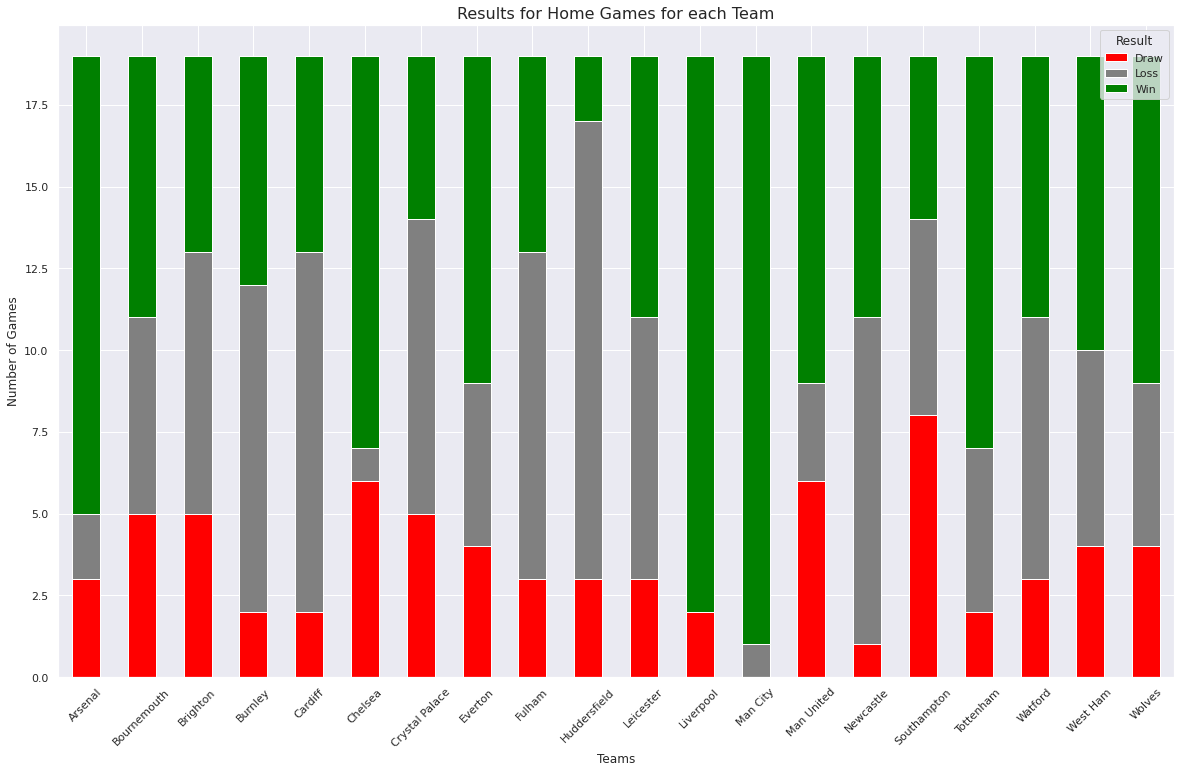

In [ ]:
sns.set(style='darkgrid')
results.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], figsize=(20,12))
plt.title('Results for Home Games for each Team', fontsize=16)
plt.ylabel('Number of Games')
plt.xlabel('Teams')
plt.xticks(rotation=45)

So from this table we can see that contrary to what we saw in the pie chart, it is not necessarily the case that every team saw higher win rates in their home games. Some teams like Manchester City (Man City) had almost perfect win rate during the home games whereas Hudderfield won only a few of their home games. However, if we take a look at the draws and losses, we can see that for the most part, teams generally had a above 50% win/draw rate which means that their loss rates were less than 50% for home games.

A possible variable to consider when looking at these results is the atmosphere which a club's home stadium provides. For example, when we look at Manchester City, their stadium, the Ethiad, is known to be one of the loudest and craziest environments in all of the Premier League and this has clearly assisted them in their climb to remaining undefeated at home during this season. However, when we look at a club like Southampton, they were searching for balance within their club during this season and therefore the fans did not show up to their games as much due to tensions surroudning the poor performance of their team as well as a lack of initiative by the owners to bring in talent. Despitue not being able to exactly pinpoint causes of winning/losing at home, it is clear that having a strong fanbase is essential for home games.

## Tallying Up Wins
Since our dataset has a 'Date' attribute, one of the things we can explore with our data is the wins for each team over time. 

Since we want to get the number of wins per team over time, we need to count the number of wins for each team per date. To do this, we will use the .groupby() method to group on both teams and dates and counting the size of each group to get the number of wins. Of course, we can achieve a similar result using nested for loops iterating each combination of teams and dates and counting their wins, but using the .groupby() method will result in less code and making it easier to read.

Note that after the group by, we used the .reset_index() method to convert the GroupBySeries back to a normal DataFrame. This is because after the group by, both 'Date' and 'WinTeam' are combined to become the new index column, however we still need them for later so we will be converting it back to a normal DataFrame.

In [ ]:
# Group by dates and wins counting number of wins before converting back to normal DataFrame
dfg = df.groupby(['Date', 'WinTeam']).size().reset_index()

# Renaming new count column
dfg.rename({dfg.columns[2] : 'Wins'}, axis=1, inplace=True)

dfg.head(10)

,Date,WinTeam,Wins
0,2018-08-10,Man United,1
1,2018-08-11,Bournemouth,1
2,2018-08-11,Chelsea,1
3,2018-08-11,Crystal Palace,1
4,2018-08-11,Draw,1
5,2018-08-11,Tottenham,1
6,2018-08-11,Watford,1
7,2018-08-12,Draw,1
8,2018-08-12,Liverpool,1
9,2018-08-12,Man City,1


Now that we have the wins per date per team, we want to tally the wins for each team by date. With the DataFrame in its current format, it is both hard to read and work with to tally up the wins. We can expand the table sideways using .pivot_table() method to turn the teams into columns. 

Notice .pivot_table() also introduce NaN into our table. We need to replace all occurences of NaN with 0 so that the wins can be tallied up correctly. We should also drop the Draws as we want to count wins per team so it serves no purpose here.

In [ ]:
scores = dfg.copy()

# Spread out the teams into columns for better data representation and processing
scores = scores.pivot_table(index='Date', columns='WinTeam', values = 'Wins')

# Replace NaNs with 0s
scores.fillna(0.0, inplace=True)

# Drop the unnecessary Draw count
scores = scores.drop(['Draw'], axis=1)

scores.head()

WinTeam,Arsenal,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Leicester,Liverpool,Man City,Man United,Newcastle,Southampton,Tottenham,Watford,West Ham,Wolves
Date,,,,,,,,,,,,,,,,,,,,
2018-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-11,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2018-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-18,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-08-19,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Now that we have properly expanded the table so that each row represents the number of wins (cells) for each team (columns) for that date (rows). We can cumulatively tally up the wins to get the total wins for each team up until that date. There are various ways to do this, for example, a bruteforce approach would be to create a new DataFrame and iterate through each date, filtering through the 'scores' DataFrame for all dates before less than or equal to it and sum them up. 

However this approach is not very efficient, so for this tutorial, we will just iterate through each row and cumulatively add the sum up the previous row with the current row.

In [ ]:
tally = scores.copy()

# Get all the unique dates games were played on
dates = df['Date'].unique()

# Iterate through each date, adding the sum up to the previous date with the counts of the new date
for i in range(1, len(dates)):
  tally.iloc[i] = tally.iloc[i-1] + tally.iloc[i]

tally

WinTeam,Arsenal,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Leicester,Liverpool,Man City,Man United,Newcastle,Southampton,Tottenham,Watford,West Ham,Wolves
Date,,,,,,,,,,,,,,,,,,,,
2018-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-11,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2018-08-12,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2018-08-18,0.0,2.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
2018-08-19,0.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-03,20.0,12.0,9.0,11.0,9.0,20.0,12.0,15.0,7.0,3.0,15.0,28.0,30.0,19.0,11.0,9.0,23.0,14.0,13.0,15.0
2019-05-04,20.0,13.0,9.0,11.0,9.0,20.0,13.0,15.0,7.0,3.0,15.0,29.0,30.0,19.0,11.0,9.0,23.0,14.0,14.0,16.0
2019-05-05,20.0,13.0,9.0,11.0,9.0,21.0,13.0,15.0,7.0,3.0,15.0,29.0,30.0,19.0,11.0,9.0,23.0,14.0,14.0,16.0


Using matplotlib library we can plot the data calculated above over time as a line graph.

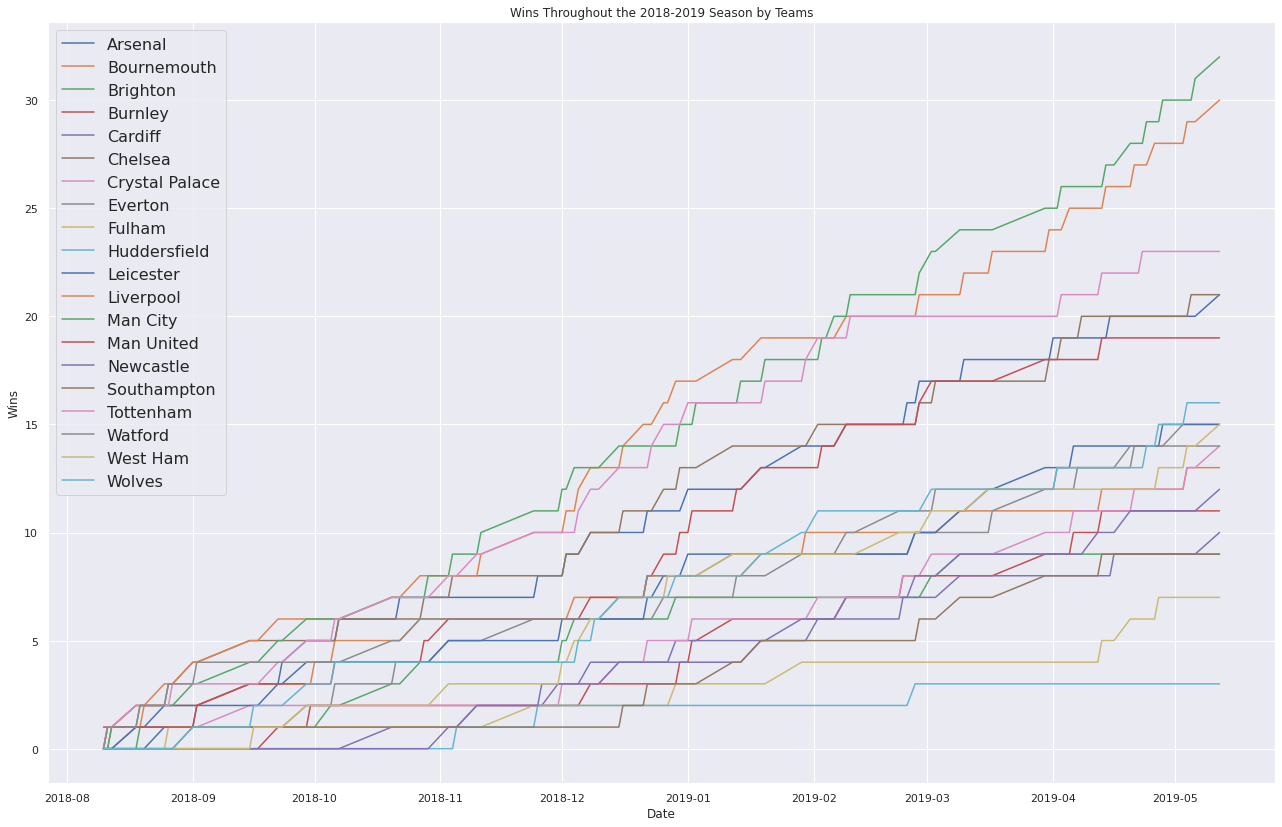

In [ ]:
plt.figure(figsize = (22, 14))
for team in tally.columns:
  plt.plot(dates, tally[team], label=team)

plt.legend(prop={'size': 16})
plt.title('Wins Throughout the 2018-2019 Season by Teams')
plt.xlabel('Date')
plt.ylabel('Wins')
plt.show()

From this graph, we can see that the top five teams with most wins are Man City, Liverpool, Tottenham, Chelsea, and Arsenal. We can also see that the lines for the first two teams, Man City and Liverpool, are very close to the y=x line indicating that these two teams have very high win rates.

## Points and Ranking
In the Premier League Football, wins are not the sole measurement of each teams performance and standings. The league uses a points system to determine the standings of each team. The formula for calculating the points of each team is:

$\mathbf{pts} = (3 \times \mathbf{wins}) + \mathbf{draws}$

Since we have already tallied up the wins above, let us repeat the same process for draws. But unlike wins, which only get added to one team at the end of a game, draws apply to both team's statistics.

In [ ]:
### import warnings
### warnings.filterwarnings('ignore')


# Unlike above, where only one team receives the win, here, both teams receive a draw
homedraw = df.loc[df['WinTeam'] == 'Draw'].groupby(['Date', 'HomeTeam']).size().reset_index()
awaydraw = df.loc[df['WinTeam'] == 'Draw'].groupby(['Date', 'AwayTeam']).size().reset_index()
homedraw.rename({homedraw.columns[1] : 'Team', homedraw.columns[2] : 'Draws'}, axis=1, inplace=True)
awaydraw.rename({awaydraw.columns[1] : 'Team', awaydraw.columns[2] : 'Draws'}, axis=1, inplace=True)
homedraw.append(awaydraw)

,Date,Team,Draws
0,2018-08-11,Wolves,1
1,2018-08-12,Southampton,1
2,2018-08-18,Cardiff,1
3,2018-08-25,Bournemouth,1
4,2018-08-25,Huddersfield,1
...,...,...,...
66,2019-05-05,Brighton,1
67,2019-05-05,Man United,1
68,2019-05-12,Chelsea,1
69,2019-05-12,Everton,1


Once again, we use a pivot table to spread the data for each team into the columns.

In [ ]:
# Count the draws for each team and date
draws = homedraw.append(awaydraw).groupby(['Date', 'Team']).sum().reset_index()

# Spread out the teams into columns for better data representation and processing
draws = draws.pivot_table(index='Date', columns='Team', values = 'Draws')

# Replace NaNs with 0s
draws.fillna(0.0, inplace=True)
draws.head()

Team,Arsenal,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Leicester,Liverpool,Man City,Man United,Newcastle,Southampton,Tottenham,Watford,West Ham,Wolves
Date,,,,,,,,,,,,,,,,,,,,
2018-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-08-12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-08-18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-08-25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2018-09-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As per the formula for calculating points, we will multiply each win by 3 and then add the draws.

In [ ]:
# Take untallied data from before and multiply all values by 3
points = scores[scores.select_dtypes(include=['number']).columns] * 3

# Add draws
points = points.add(draws, fill_value=0)
points

WinTeam,Arsenal,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Leicester,Liverpool,Man City,Man United,Newcastle,Southampton,Tottenham,Watford,West Ham,Wolves
Date,,,,,,,,,,,,,,,,,,,,
2018-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-11,0.0,3.0,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,1.0
2018-08-12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-08-18,0.0,3.0,0.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
2018-08-19,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-05-04,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
2019-05-05,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Tally up the points once more to get the cumulative points for each team at each date.

In [ ]:
tally_points = points.copy()

# Get all the unique dates games were played on
num_dates = len(tally_points.index)

# Iterate through each date, adding the sum up to the previous date with the points of the new date
for i in range(1, num_dates):
  tally_points.iloc[i] = tally_points.iloc[i-1] + tally_points.iloc[i]

tally_points.tail()

WinTeam,Arsenal,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Leicester,Liverpool,Man City,Man United,Newcastle,Southampton,Tottenham,Watford,West Ham,Wolves
Date,,,,,,,,,,,,,,,,,,,,
2019-05-03,66.0,42.0,35.0,40.0,31.0,68.0,43.0,53.0,26.0,14.0,51.0,91.0,92.0,65.0,42.0,38.0,70.0,50.0,46.0,54.0
2019-05-04,66.0,45.0,35.0,40.0,31.0,68.0,46.0,53.0,26.0,14.0,51.0,94.0,92.0,65.0,42.0,38.0,70.0,50.0,49.0,57.0
2019-05-05,67.0,45.0,36.0,40.0,31.0,71.0,46.0,53.0,26.0,15.0,51.0,94.0,92.0,66.0,42.0,38.0,70.0,50.0,49.0,57.0
2019-05-06,67.0,45.0,36.0,40.0,31.0,71.0,46.0,53.0,26.0,15.0,51.0,94.0,95.0,66.0,42.0,38.0,70.0,50.0,49.0,57.0
2019-05-12,70.0,45.0,36.0,40.0,34.0,72.0,49.0,54.0,26.0,16.0,52.0,97.0,98.0,66.0,45.0,39.0,71.0,50.0,52.0,57.0


Use plotly to create and interactive graph showing the total points for each team over time.

In [ ]:
import plotly.graph_objs as go 
#import plotly.graph_objs as go
#pyo.init_notebook_mode()

fig = go.Figure()
num_teams = len(tally_points.columns)

for i in range(0, num_teams):
  team = tally_points.columns[i]
  fig.add_trace(go.Scatter(x=tally_points.index, y=tally_points[team], name=team))

fig.update_layout(title="Cumulative Points for Teams Throughout the Season", xaxis_title="Dates", yaxis_title="Points", width=1200, height=900)
fig.show(renderer="colab")

From this line graph, we can get a better idea of how each team was really performing when compared with others. Comparing this line graph to the one generated using only wins, we can see that the 3rd to 6th team turned out to be much closer in terms of points than we thought. In fact, looking at the previous graph can see that while Tottenham ended the season with higher number of wins than Chelsea, in terms of points, Chelsea managed to overtake Tottenham just before the season ended. Similar trends can be seen for some of the other teams in both line graphs.

While points are great for looking at teams performance throughout the season, it can be hard to see each team's rankings relative to other team's points during a specific time in the season. For that, we can use ranks.

For each date, we will calculate the rank of each team in terms of points of all teams at that date.

In [ ]:
from scipy.stats import rankdata

ranks = tally_points.copy()

# Get all dates
dates = tally_points.index

# Iterate through each date and calculating the ranks for each team
for i in range(0, len(dates)):
  arr = ranks.iloc[i]
  ranks.iloc[i] = rankdata(-arr, method='dense')

ranks.tail()

WinTeam,Arsenal,Bournemouth,Brighton,Burnley,Cardiff,Chelsea,Crystal Palace,Everton,Fulham,Huddersfield,Leicester,Liverpool,Man City,Man United,Newcastle,Southampton,Tottenham,Watford,West Ham,Wolves
Date,,,,,,,,,,,,,,,,,,,,
2019-05-03,5.0,13.0,16.0,14.0,17.0,4.0,12.0,8.0,18.0,19.0,9.0,2.0,1.0,6.0,13.0,15.0,3.0,10.0,11.0,7.0
2019-05-04,5.0,13.0,17.0,15.0,18.0,4.0,12.0,8.0,19.0,20.0,9.0,1.0,2.0,6.0,14.0,16.0,3.0,10.0,11.0,7.0
2019-05-05,5.0,13.0,17.0,15.0,18.0,3.0,12.0,8.0,19.0,20.0,9.0,1.0,2.0,6.0,14.0,16.0,4.0,10.0,11.0,7.0
2019-05-06,5.0,13.0,17.0,15.0,18.0,3.0,12.0,8.0,19.0,20.0,9.0,2.0,1.0,6.0,14.0,16.0,4.0,10.0,11.0,7.0
2019-05-12,5.0,12.0,15.0,13.0,16.0,3.0,11.0,8.0,17.0,18.0,9.0,2.0,1.0,6.0,12.0,14.0,4.0,10.0,9.0,7.0


We will use plotly's interactive animation charts to display the points and ranks of the teams throughout the season.

For plotly's bar graph, we need to unstack the dataframe.
What this does is take the teams that are divided by the columns, and put them back into a single column called 'Team'.
Each entry will have a date, only one team, and their rank and points at that date.

In [ ]:
import plotly.express as px

# Unstack the ranks pivot table
pltranks = ranks.unstack().reset_index()
pltranks.rename({pltranks.columns[0] : 'Team', pltranks.columns[2] : 'Rank'}, axis=1, inplace=True)

# Unstack the points pivot table
pltpoints = tally_points.unstack().reset_index()
pltpoints.rename({pltpoints.columns[0] : 'Team', pltpoints.columns[2] : 'Points'}, axis=1, inplace=True)
pltranks['Points'] = pltpoints['Points']

# Conver the date into string as plotly reads string dates
pltranks['Date'] = pltranks['Date'].astype(str)

fig = px.bar(pltranks, x='Team', y='Points', color='Team', text='Rank', animation_frame='Date', range_y=[0,100],)
fig.update_layout(title="Team Rankings and Points over Time", width=1200, height=900, showlegend=True)
fig.update_traces(textfont_size=14, textangle=0)
fig.show(renderer="colab")

Now we have an interactive bar chart that will show the change in points and ranks for the teams over the season. The slider on the bottom can also be used to select the date for each date.

## Hypothesis Testing
As we've seen during the World Cup and many soccer games in the past, there have been cases where the better team may end up losing a game they should not have lost. A recent example could be Brazil vs Croatia in the 2022 World Cup. Croatia finished with just **1** shot on target (their goal) while Brazil finished with **11** but ended up losing.

With so many upsets during this World Cup, we wanted to see if these results echoed with the Premier League standings with a hypothesis test. For the purposes of the test, we will assume that teams have a 0.55 or a 55% chance of winning when they were leading at half time and have more shots on target than the opponent.

Therefore, our null hypothesis will be that we assume that if a Premier League team during the 2018/2019 season is leading at half time and finished more shots on target, their probability of winning is 0.55. The alternative hypothesis will be the inverse of this. 

This leaves us with:

h_0: p_w = 0.55
h_a: p_w ≠ 0.55

As we have 380 matches, we can assume normality via the Central Limit Theorem and will be using a one sample Z-Test with the following formula and an alpha level of 0.01:
z = (p_hat - p) / sqrt(p(1-p)/n)

In [ ]:
winsHP = 0

for i, data in df.iterrows():
  winner = "H" if data["HTR"] == 'H' else "A"
  loser = "H" if winner == "A" else "A"
  
  if data[winner+"ST"] > data[loser+"ST"] and data["FTR"] == winner:
    winsHP += 1

winsHP

163

Based on the data gathering above, we can see that only 163 teams who were winning at halftime and finished with more shots on target actually ended up winning the game. With these results, we can begin to conduct our hypothesis test.

In [ ]:
import math
import scipy.stats as st
z_score = ((163/380) - 0.55)/(math.sqrt((0.55*0.45)/380))
st.norm.cdf(z_score)

1.051445218123498e-06

As we can see from above, our p-value is much smaller than our alpha value of 0.01 and therefore we reject the null hypothesis in favor of the alternative hypothesis as there is not sufficient evidence to prove that a team leading at halftime with more total shots on target has a 0.55 of winning the game. This proves that as with sports, soccer is unpredicatable as even when leading at half and having more shots on goal total, it is not correct to assume the chances of winning are high. This only further reinforces the famous saying that "the ball is round" or in other words, anything can happen.

## K Nearest Neighbors Analysis on Betting Odds and Shots
Sports betting is very common everywhere but espcially within the Premier League scene where fans are always quick to back top teams in hopes of getting easy money. However, as we've seen above, even top teams are not necessarily guaranteed 'free wins' against easier teams. To see if there was any correlation, we are going to utilize a K Nearest Neighbors Analysis to see whether or not the betting odds correctly predicted the full time result.

We will be utilzing GridSearchCV which is an exhaustive search over specified parameter values in search of an estimator to help us tune our hyperparameters.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

map = {"H": 0, "A": 1, "D": 2}

knn_data = df.filter(["B365H", "B365D", "B365A", "FTR", "HTR", "HST", "AST"], axis = 1)

knn_data = knn_data.replace({"FTR":map, "HTR":map})

knn_data['FTR'] = knn_data['FTR'].astype(int)
knn_data['HTR'] = knn_data['HTR'].astype(int)

FTR = knn_data[["FTR"]]
knn_data = knn_data.drop('FTR', axis = 1)


FTR    int64
dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(knn_data, FTR['FTR'], stratify = FTR['FTR'], test_size = 0.2, random_state = 23)
KNN = KNeighborsClassifier()

# Finding the optimal parameters
neighbors = list(range(1,7))
parameters = dict(n_neighbors = neighbors)
accuracy_finder = GridSearchCV(KNN, param_grid = parameters, scoring = "accuracy", cv = 10)
result = accuracy_finder.fit(x_train, y_train)
print(result.best_estimator_.get_params())

# running 10 cross validations and utilizing the optimal parameters which we found
result_knn = KNeighborsClassifier(n_neighbors=5)
result_knn.fit(x_train, y_train)
result_score = result_knn.score(x_test, y_test)

result_cross = cross_val_score(result_knn, knn_data, FTR["FTR"], scoring = 'accuracy', cv = 10)
print(result_score)
print(result_cross.mean())
print(result_cross.std()/(math.sqrt(len(df))))

print(f'Accuracy: {result_cross.mean() * 100}%' )

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.6447368421052632
0.6263157894736843
0.002686409397547582
Accuracy: 62.631578947368425%


So based on the results above, our KNN was able to predict the possibility of a correct full time result prediction based on shots and betting odds at a rate of about 63% which is not the highest. However, as we've discussed before, there are many more variables to consider such as possibilities of live odds, substitutions, and injuries. In general though, it further reinforces the notion of a Premier League match remaining unpredictable as betting on a match of a game within the Premier League is only slightly better than flipping a coin.


## Conclusion

This tutorial has only covered some of the basic results to try to analyze some of the variables which can affect the outcome of the game. Furthermore, some of the analysis which we have done has highlighted trends among the teams and how they have progressed throughout the season. 

In this tutorial, we were able to successfully analyze wins and points of teams as they went along their seasons and identified reasons as to why these trends existed such as home field advantage. We also performed hypothesis testing to see if the results at half time had any bearing on the full time result. However, as we've seen from our analysis, it is quite difficult to predict the results simply based on half time results due to the variability within the premier league. 

Overall, the Premier League is very entertaining to watch and it was nice to be able to conduct some analysis on results and dive a little bit deeper with stats instead of just watching them play on TV. This tutorial serves as a little intro to the PL and has hopefully inspired you to watch a couple games to see the beauty of the game.